# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\Users\Elena Peña\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data= pd.read_csv("Categorical.csv")
data.describe()
data.head()
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [3]:
data_map=data.copy()
data_map["continent"]= data_map["continent"].map({"Europe":0, "Asia":1,"Africa":2,"North America":3, "Oceania":4, "South America":5, "Seven seas (open ocean)":6, "Antarctica":7})
data_map

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [4]:
# valores perdidos
missing_values_count = data_map.isnull().sum()
missing_values_count = data_map.isnull().sum()
missing_values_count
missing_values_count[3:4]
#data_map.notnull()

continent    0
dtype: int64

## Select the features

In [5]:
x=data_map.iloc[:,1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,3
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,3
4,20.049834,41.142450,0
...,...,...,...
236,-172.164851,-13.753243,4
237,47.586762,15.909280,1
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


## Clustering

Use 4 clusters initially.

In [6]:
kmeans=KMeans(9)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [7]:
ident_clus =kmeans.fit_predict(x)

In [8]:
ident_clus 

array([2, 1, 0, 2, 4, 4, 4, 1, 8, 1, 7, 0, 3, 0, 2, 3, 4, 1, 0, 4, 6, 6,
       5, 4, 1, 2, 2, 4, 2, 4, 2, 2, 8, 8, 2, 5, 5, 0, 6, 4, 8, 5, 6, 6,
       0, 6, 7, 2, 0, 6, 2, 2, 2, 2, 1, 1, 4, 4, 1, 2, 4, 2, 6, 2, 1, 1,
       4, 4, 1, 4, 3, 8, 4, 4, 3, 6, 4, 1, 4, 6, 6, 6, 6, 6, 4, 2, 4, 2,
       3, 2, 5, 0, 2, 4, 2, 4, 5, 4, 5, 5, 0, 4, 1, 1, 4, 1, 4, 2, 4, 1,
       5, 1, 1, 0, 1, 5, 2, 2, 5, 4, 1, 5, 1, 6, 4, 2, 4, 5, 0, 4, 4, 4,
       5, 2, 6, 4, 4, 0, 1, 2, 3, 4, 6, 4, 5, 4, 5, 3, 0, 6, 2, 0, 0, 5,
       0, 3, 6, 3, 6, 2, 7, 4, 4, 5, 3, 3, 1, 1, 2, 7, 2, 5, 3, 3, 4, 2,
       5, 4, 8, 1, 7, 1, 4, 5, 0, 6, 1, 1, 0, 6, 5, 8, 6, 3, 6, 2, 4, 1,
       1, 2, 4, 6, 2, 4, 4, 4, 0, 2, 0, 1, 2, 6, 6, 5, 1, 1, 3, 7, 2, 4,
       1, 5, 0, 0, 4, 8, 2, 1, 4, 2, 2, 2, 2, 5, 3, 7, 7, 1, 0, 0, 0])

## Plot the data

In [9]:
data_clus = data_map.copy()
data_clus["Cluster"]=ident_clus
data_clus

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,3,2
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,2,0
3,Anguilla,-63.064989,18.223959,3,2
4,Albania,20.049834,41.142450,0,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4,7
237,Yemen,47.586762,15.909280,1,1
238,South Africa,25.083901,-29.000341,2,0
239,Zambia,27.774759,-13.458242,2,0


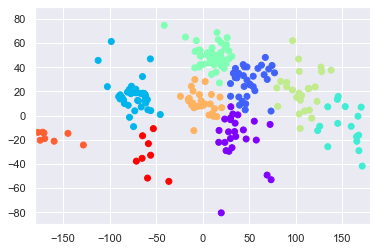

In [10]:
plt.scatter(data_clus["Longitude"], data_clus["Latitude"], c=data_clus["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

In [11]:
data = pd.read_csv("Categorical.csv",index_col='continent')
# Create a new data frame for the inputs, so we can clean it
x_scaled = data.copy()
x_scaled


,name,Longitude,Latitude
continent,,,
North America,Aruba,-69.982677,12.520880
Asia,Afghanistan,66.004734,33.835231
Africa,Angola,17.537368,-12.293361
North America,Anguilla,-63.064989,18.223959
Europe,Albania,20.049834,41.142450
...,...,...,...
Oceania,Samoa,-172.164851,-13.753243
Asia,Yemen,47.586762,15.909280
Africa,South Africa,25.083901,-29.000341


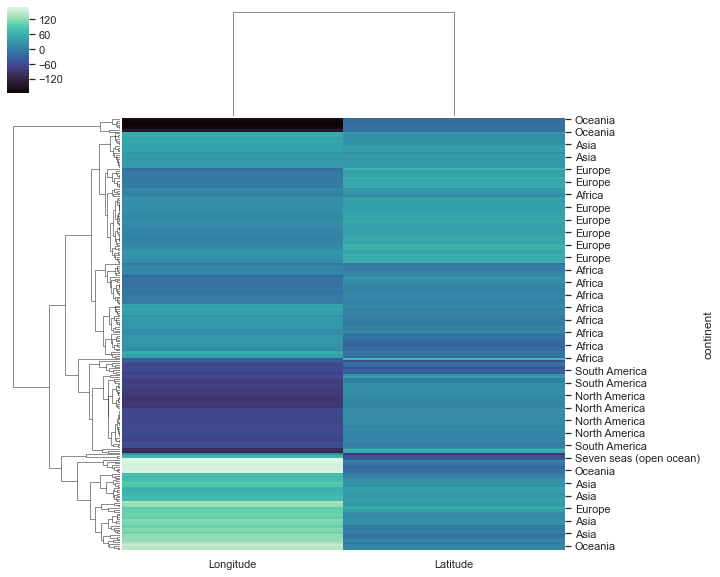

In [12]:
# Drop the variables that are unnecessary for this solution
x_scaled = x_scaled.drop(['name'],axis=1)
sns.clustermap(x_scaled, cmap='mako')
